# Speaker Diarization 

## Using pyAudioAnalysis library (https://github.com/tyiannak/pyAudioAnalysis)

### Setup

* pip install numpy matplotlib scipy sklearn hmmlearn simplejson eyed3 pydub
* brew install libmagic
* brew install ffmpeg
* git clone https://github.com/tyiannak/pyAudioAnalysis.git
* pip install -e .

In [1]:
%matplotlib inline

In [2]:
from pyAudioAnalysis import audioSegmentation as aS

### With Ground Truth (.segments file) knowledge

* red: groundttruth
* blue : test

86.2	86.2


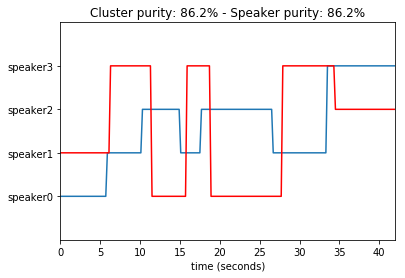

In [27]:
flags_diaEx1 = aS.speakerDiarization("../pyAudioAnalysis/pyAudioAnalysis/data/diarizationExample.wav", 4,
                      mt_size=2.0, mt_step= 0.2, st_win=0.05 ,lda_dim=0, plot_res=1)

In [28]:
(segs_diaEx1, classes_diaEx1) = aS.flags2segs(flags_diaEx1, 0.2)

In [29]:
for s in range(segs_diaEx1.shape[0]):
    print("Speaker #{} : from {} (sec) to {} (sec)\n".format( int(classes_diaEx1[s]), segs_diaEx1[s,0], segs_diaEx1[s,1]))

Speaker #0 : from 0.0 (sec) to 5.800000000000001 (sec)

Speaker #1 : from 5.800000000000001 (sec) to 10.200000000000001 (sec)

Speaker #2 : from 10.200000000000001 (sec) to 15.0 (sec)

Speaker #1 : from 15.0 (sec) to 17.6 (sec)

Speaker #2 : from 17.6 (sec) to 26.6 (sec)

Speaker #1 : from 26.6 (sec) to 33.4 (sec)

Speaker #3 : from 33.4 (sec) to 41.800000000000004 (sec)



### When no knowledge about number of participants

86.2	86.2


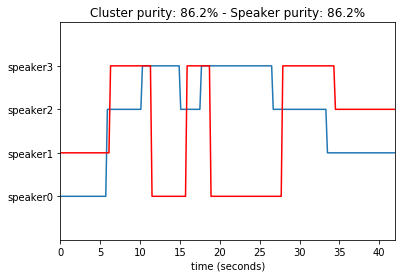

In [30]:
flags_diaEx1_0 = aS.speakerDiarization("../pyAudioAnalysis/pyAudioAnalysis/data/diarizationExample.wav", 4,
                      mt_size=2.0, mt_step= 0.2, st_win=0.05 ,lda_dim=0, plot_res=1)

In [91]:
# Could also be run by command line
#%run ../pyAudioAnalysis/pyAudioAnalysis/audioAnalysis.py speakerDiarization -i ../pyAudioAnalysis/pyAudioAnalysis/data/diarizationExample.wav --num 4

### Without Ground Truth (.segments file) knowledge

In [17]:
flags_diaEx1_wgt = aS.speakerDiarization("audio_sample/AI_Challenge.wav", 2,
                      mt_size=2.0, mt_step= 0.2, st_win=0.05 ,lda_dim=0)

In [18]:
#flags2segs(flags, window)
(segs_diaEx1_wgt, classes_diaEx1_wgt) = aS.flags2segs(flags_diaEx1_wgt, 0.2)

In [19]:
for s in range(segs_diaEx1_wgt.shape[0]):
    print("Speaker #{} : from {} (sec) to {} (sec)\n".format(int(classes_diaEx1_wgt[s]), segs_diaEx1_wgt[s,0], segs_diaEx1_wgt[s,1]))

Speaker #0 : from 0.0 (sec) to 18.2 (sec)

Speaker #1 : from 18.2 (sec) to 38.2 (sec)

Speaker #0 : from 38.2 (sec) to 50.400000000000006 (sec)

Speaker #1 : from 50.400000000000006 (sec) to 63.6 (sec)



In [24]:
classes_diaEx1_wgt

[0.0, 1.0, 0.0, 1.0]

In [23]:
segs_diaEx1_wgt

array([[ 0. , 18.2],
       [18.2, 38.2],
       [38.2, 50.4],
       [50.4, 63.6]])

In [3]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np

In [7]:
import numpy as np

In [12]:
def show_spkDia(flags, mt_step=0.2):
    (segs, classes) = aS.flags2segs(flags, 0.2)
    for s in range(segs.shape[0]):
        print("Speaker #{} : from {} (sec) to {} (sec)\n".format( int(classes[s]), segs[s,0], segs[s,1]))
    nSpeakersFinal = len(set(classes))
    cls_ = flags
    class_names = ["speaker{0:d}".format(c) for c in range(nSpeakersFinal)]
    fig = plt.figure()    
    ax1 = fig.add_subplot(111)
    ax1.set_yticks(np.array(range(len(class_names))))
    ax1.set_yticklabels(class_names)
    plt.title("Speaker Diarization")
    plt.xlabel("time (seconds)")
    #ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.3))
    ax1.plot(np.array(range(len(cls_)))*mt_step+mt_step/2.0, cls_);

In [13]:
hello_ex = aS.speakerDiarization("audio_sample/AI_Challenge.wav", 2,
                      mt_size=2.0, mt_step= 0.2, st_win=0.05 ,lda_dim=0)

Speaker #0 : from 0.0 (sec) to 18.2 (sec)

Speaker #1 : from 18.2 (sec) to 38.2 (sec)

Speaker #0 : from 38.2 (sec) to 50.400000000000006 (sec)

Speaker #1 : from 50.400000000000006 (sec) to 63.6 (sec)



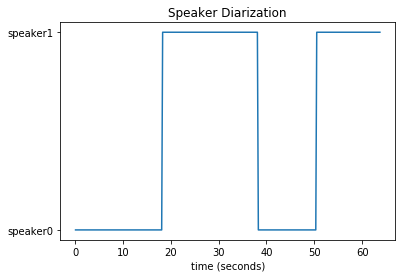

In [14]:
show_spkDia(hello_ex)

In [15]:
flags_sbc018 = aS.speakerDiarization("../spokenDiag/SBC018.wav", 4,
                      mt_size=2.0, mt_step= 0.2, st_win=0.05 ,lda_dim=0)